#  CS251: Data Analysis and Visualization

## 2D Rotation matrices

Spring 2021

Oliver W. Layton

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

In [2]:
import data
import analysis

### 2D rotation (T-shaped data)

Load in tData.csv

In [4]:
d = data.Data( 'data/tData.csv')

Let's make a scatterplot to see what the (x, y) data looks like

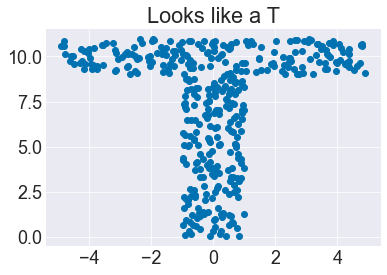

In [5]:
a = analysis.Analysis(d)
a.scatter( 'x', 'y', 'Looks like a T');

In [6]:
def rotation_matrix_2D(angle):
    '''Creates a 2D rotation matrix
    
    Parameters:
    -----------
    angle: float. Rotation angle in degrees.
    
    Returns:
    -----------
    ndarray. shape=(3, 3). The 2D rotation matrix with homogeneous coordinate.
    '''
    rad = np.deg2rad(angle)
    return np.array([[np.cos(rad),-np.sin(rad),0],[np.sin(rad),np.cos(rad),0],[0,0,1]])

def translation_matrix_2D(xtrans,ytrans):
    T = np.eye(3)
    T[0,2] = xtrans
    T[1,2] = ytrans
    return T

Let's grab the raw t-shaped data as an ndarray and add a homogenous coordinate.

In [7]:
tData = d.get_all_data()
print(tData.shape)

(400, 2)


In [8]:
tDatah = np.hstack( (tData, np.ones((tData.shape[0],1))) )
print( tDatah.shape )

(400, 3)


TODO:
- Pick any rotation angle we want and create the appropriate rotation matrix.
- Apply the rotation transform to the data.
- Plot the data after the transformation has been applied.

(400, 3)


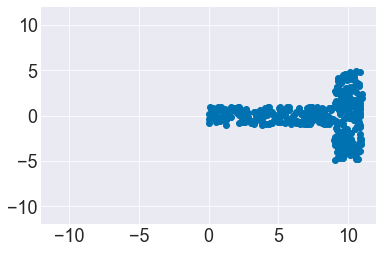

In [9]:
R = rotation_matrix_2D(-90)
newDatah = R @ tDatah.T
rotatedData = newDatah.T
print(rotatedData.shape)

plt.plot(rotatedData[:, 0], rotatedData[:, 1], 'o')
plt.xlim([-12, 12])
plt.ylim([-12, 12])
plt.show()

(400, 3)


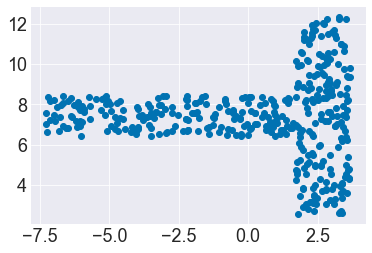

In [12]:
R = rotation_matrix_2D(-90)
center = np.mean( tData, axis=0 )
T1 = translation_matrix_2D( -center[0], -center[1] )
T2 = translation_matrix_2D( center[0], center[1] )
# working from right to left,
# translate data so center is at origin
# rotate around origin
# translate data so center is back at original location.
newDatah = T2 @ R @ T1 @ tDatah.T
rotatedData = newDatah.T
print(rotatedData.shape)

plt.plot(rotatedData[:, 0], rotatedData[:, 1], 'o')
plt.show()

(400, 3)
(400, 3)
(400, 3)


/Users/Collins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


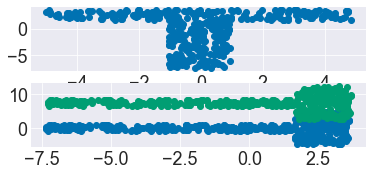

In [13]:
step1 = T1 @ tDatah.T
rotatedData = step1.T
print(rotatedData.shape)

plt.subplot( 3, 1, 1)
plt.plot(rotatedData[:, 0], rotatedData[:, 1], 'o')

step2 = R @ step1
rotatedData = step2.T
print(rotatedData.shape)

plt.subplot( 3, 1, 2)
plt.plot(rotatedData[:, 0], rotatedData[:, 1], 'o')

step2 = T2 @ step2
rotatedData = step2.T
print(rotatedData.shape)

plt.subplot( 3, 1, 2)
plt.plot(rotatedData[:, 0], rotatedData[:, 1], 'o')


plt.show()